# Fault Diagnosis Toolbox in Python -- a development notebook

Erik Frisk<br>
<frisk@isy.liu.se><br>
Department of Electrical Engineering<br>
Linköping University<br>
Sweden

## Basic Python imports

In [1]:
##%matplotlib inline
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import sys
import numpy as np
import csv
import scipy.sparse as sp

## Helper functions

In [2]:
def BoxOff(*argin):
    if len(argin)>0:
        ax=argin[0]
    else:
        ax=plt.gca();
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## Fault Diagnosis Toolbox import

In [3]:
sys.path.append("faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/")
import faultdiagnosistoolbox as fdt
reload(fdt);

## Defining a diagnosis models -- structural information

Simple structure model from the DAMADICS benchmark problem

In [4]:
modelDef={}

modelDef['type'] = 'Symbolic'
modelDef['x']= ['p1','p2','p3','q0','q1','q2','q3','dp1','dp2','dp3']
modelDef['f'] = ['fV1','fV2','fV3','fT1','fT2','fT3','f100']
modelDef['z'] = ['y1','y2','y3']
modelDef['parameters'] = ['Rv1', 'Rv2', 'Rv3', 'CT1', 'CT2', 'CT3']
modelDef['rels'] = [
    ['q1', 'p1', 'p2', 'fV1'],
    ['q2', 'p2', 'p3', 'fV2'],
    ['q3', 'p3', 'fV3'],
    ['dp1','q0','q1','fT1','f100'],
    ['dp2','q1','q2','fT2'],
    ['dp3','q2','q3','fT3'],
    ['y1','p1'],
    ['y2','q2'],
    ['y3','q0'],
    fdt.DiffConstraint('dp1','p1'),
    fdt.DiffConstraint('dp2','p2'),
    fdt.DiffConstraint('dp3','p3')]

model = fdt.DiagnosisModel( modelDef );
model.name = 'Three tank system';

In [12]:
print "Model: %s" % model.name
print "  (ne, nx, nf, nz) = (%d,%d,%d,%d)" % (model.ne(), model.nx(), model.nf(), model.nz())
print "  sprank(X) = %d" % model.sprank()

Model: Three tank system
  (ne, nx, nf, nz) = (12,10,7,3)
  sprank(X) = 10


<IPython.core.display.Javascript object>


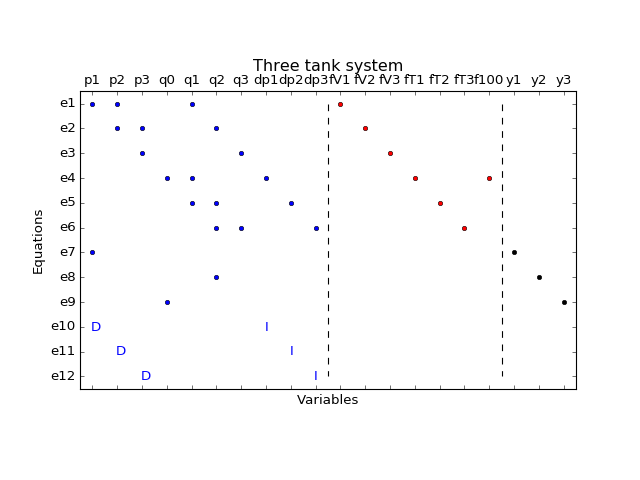

In [13]:
plt.figure(10)
model.PlotModel(verbose=True)
plt.show()

<IPython.core.display.Javascript object>


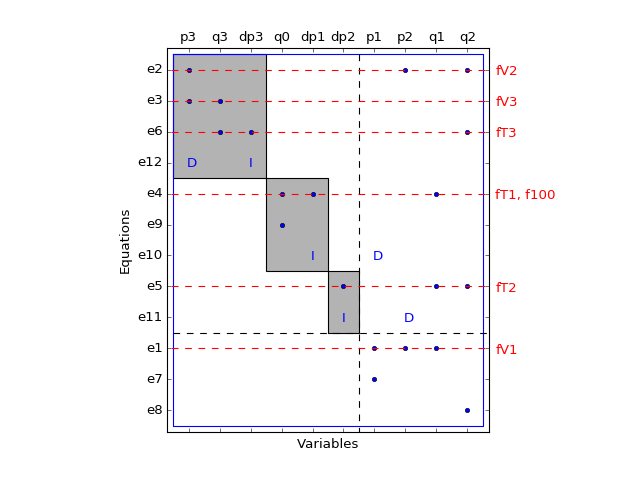

In [14]:
plt.figure(11)
model.PlotDM(eqclass=True,fault=True)
plt.show()

In [15]:
print "Searching for MSO sets..."
msos=model.MSO()
print "Found %d mso sets" % len(msos)

Searching for MSO sets...
Found 6 mso sets
